In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_excel("Walmart Sales.xlsx", parse_dates=["Date"])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3


In [3]:
df.shape

(1000, 12)

In [4]:
df.describe()

,Unit price,Quantity,Date,Rating
count,1000.000000,1000.000000,1000,1000.00000
mean,55.672130,5.510000,2019-02-14 00:05:45.600000,6.97270
min,10.080000,1.000000,2019-01-01 00:00:00,4.00000
25%,32.875000,3.000000,2019-01-24 00:00:00,5.50000
50%,55.230000,5.000000,2019-02-13 00:00:00,7.00000
75%,77.935000,8.000000,2019-03-08 00:00:00,8.50000
max,99.960000,10.000000,2019-03-30 00:00:00,10.00000
std,26.494628,2.923431,NaN,1.71858


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Date           1000 non-null   datetime64[ns]
 9   Time           1000 non-null   object        
 10  Payment        1000 non-null   object        
 11  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 93.9+ KB


## Analyse sales and revenue genrearted across different variables

In [6]:
# Create a column named Revenue
df = df.assign(
    Revenue=df["Unit price"]*df["Quantity"]
    ).rename(
    columns={"Quantity": "Sales"}
)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Sales,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17


In [7]:
# Revenue & sales vs citywise
df_grouped = df.groupby(["City"]).agg(
     total_sales=pd.NamedAgg(column="Sales", aggfunc="sum"),
     total_revenue=pd.NamedAgg(column="Revenue", aggfunc="sum")
)
df_grouped

,total_sales,total_revenue
City,,
Mandalay,1820,101140.64
Naypyitaw,1831,105303.53
Yangon,1859,101143.21


### Observation:
- City `Yangon` has highest total sales.
- City `Naypyitaw` has highest total revenue generated.

In [8]:
# Revenue & Sales Branchwise across all cities
df_grouped = df.groupby(["Branch"]).agg(
     total_sales=pd.NamedAgg(column="Sales", aggfunc="sum"),
     total_revenue=pd.NamedAgg(column="Revenue", aggfunc="sum")
)
df_grouped

,total_sales,total_revenue
Branch,,
A,1883,103763.00
B,1899,107567.19
C,1728,96257.19


### Observation:
- Branch `B` has highest total sales and revenue generated across all cities.

In [9]:
# Revenue & Sales vs Branch and City
df_grouped = df.groupby(["City", "Branch"]).agg(
     total_sales = pd.NamedAgg(column="Sales", aggfunc="sum"),
     total_revenue = pd.NamedAgg(column="Revenue", aggfunc="sum")
)
df_grouped

total_sales  total_revenue
City      Branch                            
Mandalay  A               637       34130.09
          B               664       37215.93
          C               519       29794.62
Naypyitaw A               648       35985.64
          B               604       35157.75
          C               579       34160.14
Yangon    A               598       33647.27
          B               631       35193.51
          C               630       32302.43

### Observation:
- City `Yangon` has highest total sales in city `B` with highest total revenue.
- City `Naypyitaw` has highest total sales in city `A` with highest total revenue.
- City `Mandalay` has highest total sales in city `B` with highest total revenue.

## Visualise data

In [10]:
# We will write a function to get the barplot of different variables w.r.t to Sales
def plot_bar_chart_sales(hue_column, dataframe, title):
    sns.barplot(
        data=dataframe,
        x="City",
        y="Sales",
        hue=hue_column,
        estimator="sum",
    )
    plt.xticks(rotation=90)
    plt.title(title)

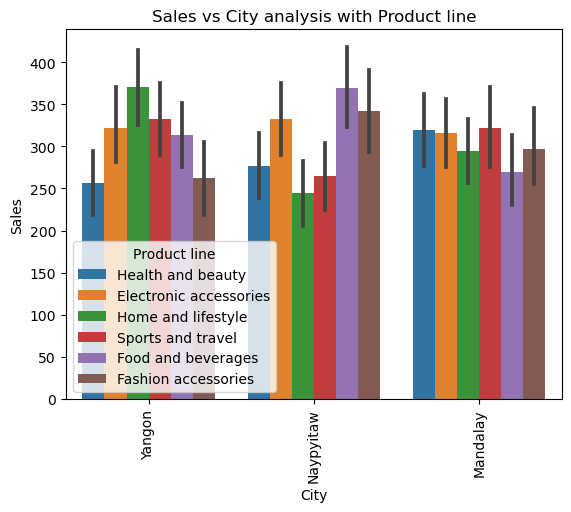

In [11]:
# Sales vs Product line
plot_bar_chart_sales(hue_column="Product line", 
                     dataframe=df, 
                     title="Sales vs City analysis with Product line")

### Observation:
- City `Yangon` has highest total sales for the product under `Home and lifestyle` and lowest total sales for `Health and beauty` category.
- City `Naypyitaw` has highest total sales for the product under `Food and beverages` and lowest total sales for `Home and lifestyle` category.
- City `Mandalay` has highest total sales for the product under `Sports and travel` and lowest total sales for `Food and beverages` category.

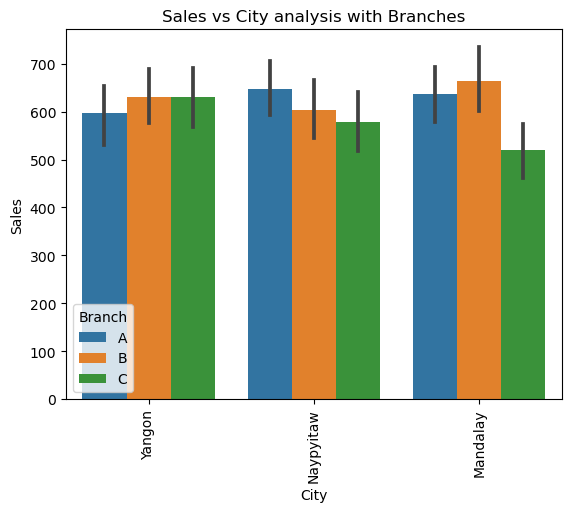

In [12]:
# Sales vs Branch
plot_bar_chart_sales(hue_column="Branch", dataframe=df, title="Sales vs City analysis with Branches")

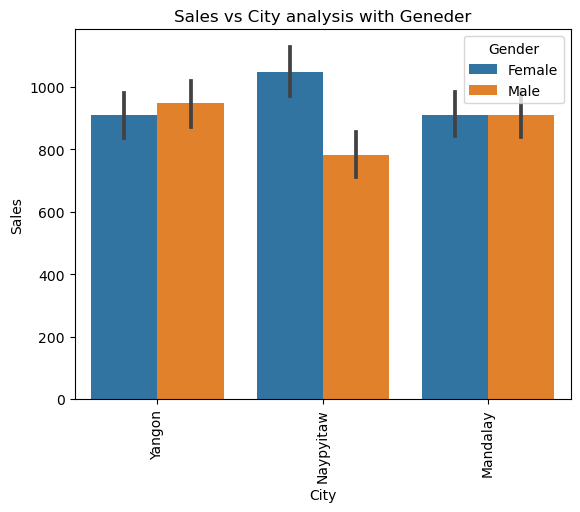

In [13]:
# Sales vs Gender
plot_bar_chart_sales(hue_column="Gender", dataframe=df, title="Sales vs City analysis with Geneder")

### Observation:
- City `Yangon` has highest total sales made under `Male` category where as other two cities have more sales made under `Female` category

In [14]:
# We will write a function to get the barplot of different variables w.r.t to Revenue
def plot_bar_chart_revenue(hue_column, dataframe, title):
    sns.barplot(
        data=dataframe,
        x="City",
        y="Revenue",
        hue=hue_column,
        estimator="sum"
    )
    plt.xticks(rotation=90)
    plt.title(title)

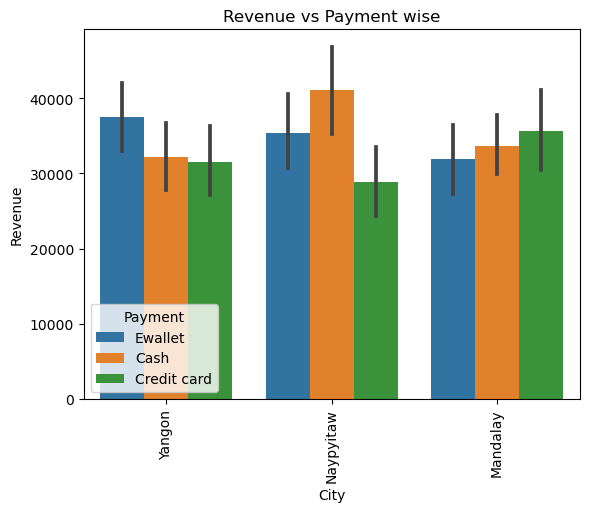

In [15]:
# Revenue vs payment type
plot_bar_chart_revenue("Payment", df, "Revenue vs Payment wise")

### Observation:
- City `Yangon` has highest total revenue from payment type `Ewallet` and lowest from `Credit card`.
- City `Naypyitaw` has highest total revenue from payment type `Cash` and lowest from `Credit card`.
- City `Mandalay` has highest total revenue from payment type `Credit card` and lowest from `Ewallet`.

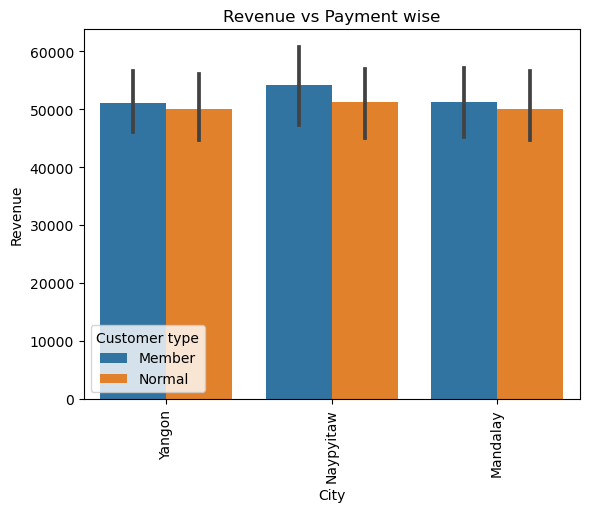

In [16]:
# Revenue vs Customer type
plot_bar_chart_revenue("Customer type", df, "Revenue vs Payment wise")

### Observation:
- All three cities have highest total revenue from `Member` Customer type.

## Analyse and visualize the data w.r.t time

In [17]:
# Create Month and Year columns from Date
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Sales,Date,Time,Payment,Rating,Revenue,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83,1,2019
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31,3,2019
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76,1,2019
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17,2,2019


In [18]:
# Create a function to create a subset dataframe
def subset_dataframe(column, dataframe):
    pd.set_option('display.max_rows', 1200)
    grouped_dataframe_product = df.groupby(by=[column, "Month"]).agg(
        total_sales=pd.NamedAgg(
            column="Sales", 
            aggfunc="sum"
    ),
        total_revenue=pd.NamedAgg(
            column="Revenue", 
            aggfunc="sum"
    ))
    return grouped_dataframe_product

In [19]:
# Subset City dataset
df_city = subset_dataframe("City", df)
df_city

total_sales  total_revenue
City      Month                            
Mandalay  1              600       35405.77
          2              624       32785.02
          3              596       32949.85
Naypyitaw 1              680       38509.22
          2              537       31366.65
          3              614       35427.66
Yangon    1              685       36839.17
          2              493       28438.21
          3              681       35865.83

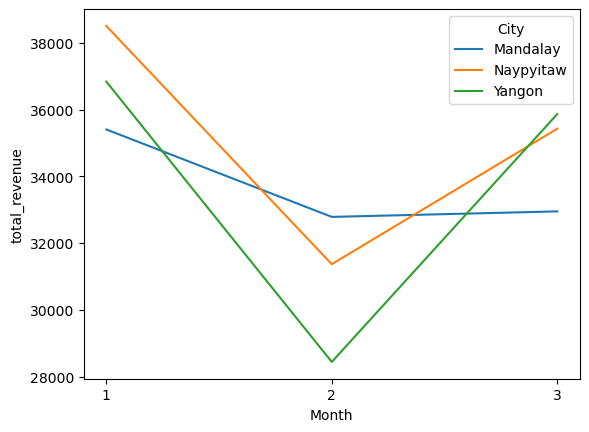

In [20]:
# Total revenue across different city Month over Month
sns.lineplot(data=df_city, x="Month", y="total_revenue", hue="City")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

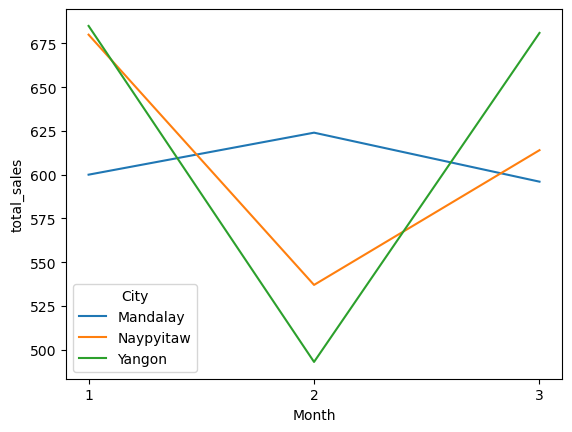

In [21]:
# Total sales across different city Month over Month
sns.lineplot(data=df_city, x="Month", y="total_sales", hue="City")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

### Observation:
- Except city `Mandalay` both sales and revenue for other city has increased from Month 2.

In [22]:
# Subset customer type dataset
df_customer = subset_dataframe("Customer type", df)
df_customer

total_sales  total_revenue
Customer type Month                            
Member        1              964       55156.98
              2              838       47901.00
              3              983       53345.30
Normal        1             1001       55597.18
              2              816       44688.88
              3              908       50898.04

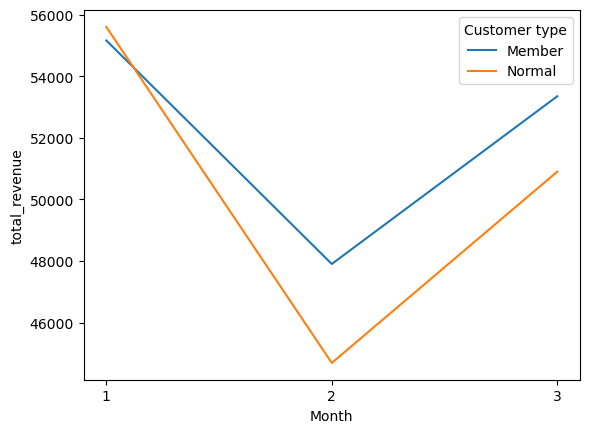

In [23]:
# Total revenue across different customer type Month over Month
sns.lineplot(data=df_customer, x="Month", y="total_revenue", hue="Customer type")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

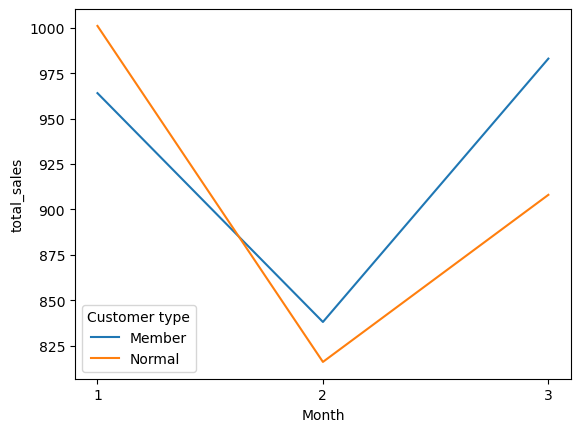

In [24]:
# Total sales across different customer type Month over Month
sns.lineplot(data=df_customer, x="Month", y="total_sales", hue="Customer type")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

### Observation:
- Customer type `Member` has decreased both sales and revenue across all cities w.r.t **Month 1**.

In [25]:
# Subset Gender type dataset
df_gender = subset_dataframe("Gender", df)
df_gender

total_sales  total_revenue
Gender Month                            
Female 1             1019       56322.84
       2              951       53652.91
       3              899       49912.75
Male   1              946       54431.32
       2              703       38936.97
       3              992       54330.59

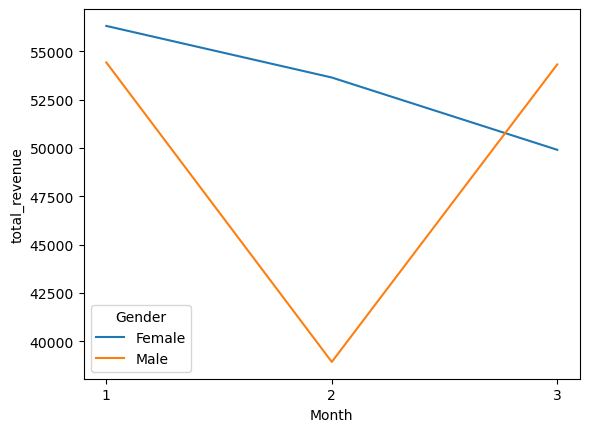

In [26]:
# Total revenue across different gender type Month over Month
sns.lineplot(data=df_gender, x="Month", y="total_revenue", hue="Gender")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

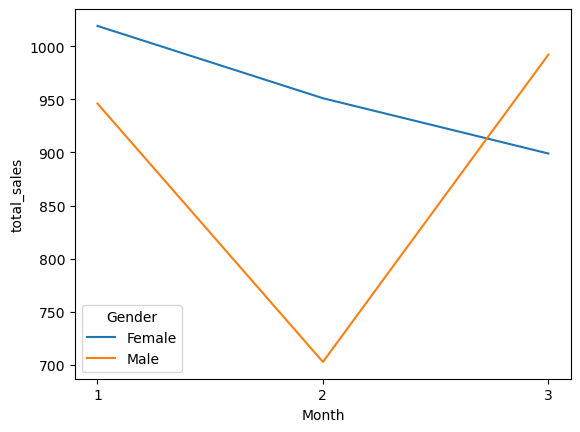

In [27]:
# Total sales across different gender type Month over Month
sns.lineplot(data=df_gender, x="Month", y="total_sales", hue="Gender")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

### Observation:
- Gender `Member` has decreased both sales and revenue across all cities from **Month 1**.

In [28]:
# Subset payment dataset
df_payment = subset_dataframe("Payment", df)
df_payment

total_sales  total_revenue
Payment     Month                            
Cash        1              708       39781.03
            2              596       34044.13
            3              592       33038.24
Credit card 1              622       36425.31
            2              505       29866.69
            3              595       29676.64
Ewallet     1              635       34547.82
            2              553       28679.06
            3              704       41528.46

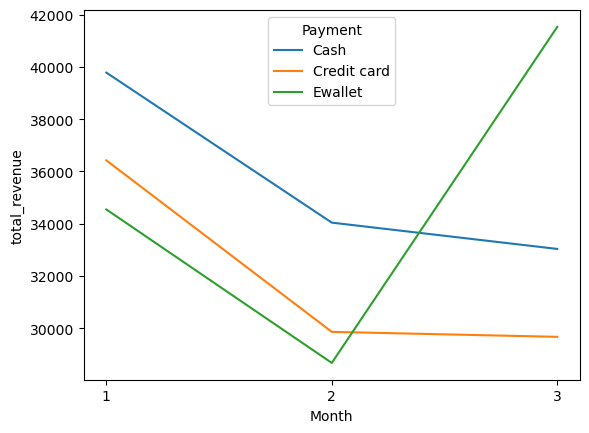

In [29]:
# Total revenue across different gender type Month over Month
sns.lineplot(data=df_payment, x="Month", y="total_revenue", hue="Payment")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

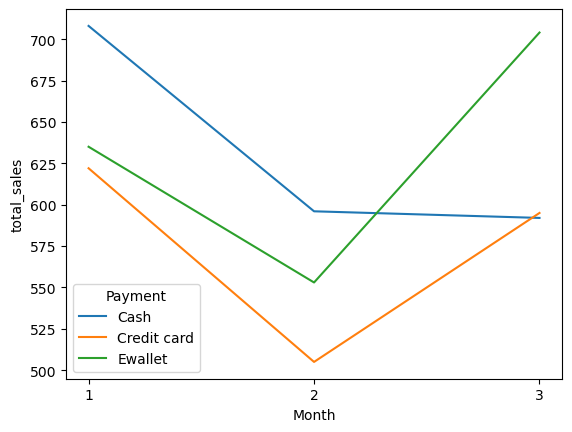

In [30]:
# Total sales across different gender type Month over Month
sns.lineplot(data=df_payment, x="Month", y="total_sales", hue="Payment")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

### Observation:
- Payment `Ewallet` has maximum contribution towards sales and revenue made from **Month 1**.

In [31]:
# Subset product line dataset
df_product = subset_dataframe("Product line", df)
df_product

total_sales  total_revenue
Product line           Month                            
Electronic accessories 1              333       17934.56
                       2              313       16536.10
                       3              325       17279.37
Fashion accessories    1              336       18423.92
                       2              295       18104.63
                       3              271       15191.35
Food and beverages     1              325       18638.60
                       2              349       19047.96
                       3              278       15784.72
Health and beauty      1              254       15603.02
                       2              266       13906.91
                       3              334       17341.25
Home and lifestyle     1              342       19518.80
                       2              205       11842.27
                       3              364       19935.99
Sports and travel      1              375       20635.26
                       2              226       13152.01
                       3              319       18710.66

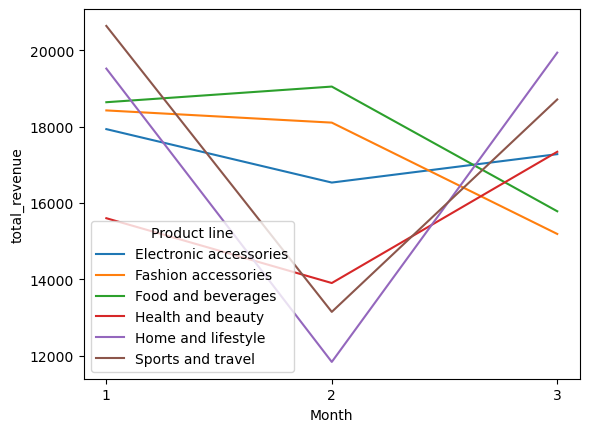

In [32]:
# Total revenue across different product type Month over Month
sns.lineplot(data=df_product, x="Month", y="total_revenue", hue="Product line")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

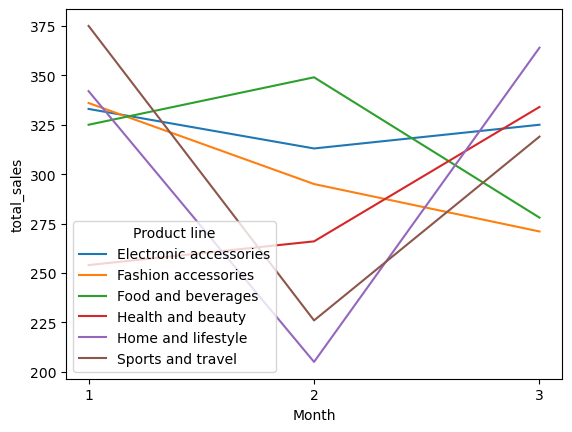

In [33]:
# Total sales across different product type Month over Month
sns.lineplot(data=df_product, x="Month", y="total_sales", hue="Product line")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

### Observation:
- Product under category `Home and lifestyle` has maximum contribution towards sales and revenue made in **Month 3**.